In [20]:
# -*- coding: utf-8 -*-
# Made available at http://www.mariofilho.com
# For educational purposes only, Author offers NO GUARANTEES
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error
import numpy as np
import pandas as pd


#MAPE calculation function
def mape(y_pred,y_true):

    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100


dateparse = lambda dates: pd.datetime.strptime(dates, '%d/%m/%Y')
data = pd.read_csv('Data_Venda2.csv', delimiter = ';', parse_dates=['Data'], index_col='Data',date_parser=dateparse)
data.head()


#data = pd.read_csv('Data_Venda2.csv',header=0,index_col=0).sort_index()

x_data = []
y_data = []

# Creates a feature matrix with values from previous 6 months
for d in range(6,data.shape[0]):
    
    x = data.iloc[d-6:d].values.ravel()
    y = data.iloc[d].values[0]

    x_data.append(x)
    y_data.append(y)


x_data = np.array(x_data)
y_data = np.array(y_data)




#Lists to store the predictions of the models
y_pred = []
y_pred_last = []
y_pred_ma = []
y_true = []



#Iterate over the time series creating a new model each month
end = y_data.shape[0]
for i in range(30,end):

    x_train = x_data[:i,:]
    y_train = y_data[:i]
    
    x_test = x_data[i,:]
    y_test = y_data[i]


    model = LinearRegression(normalize=True)
    model.fit(x_train,y_train)

    y_pred.append(model.predict(x_test.reshape(1, -1))[0])
    y_pred_last.append(x_test[-1])
    y_pred_ma.append(x_test.mean())
    y_true.append(y_test)


#Transforms the lists into numpy arrays
y_pred = np.array(y_pred)
y_pred_last = np.array(y_pred_last)
y_pred_ma = np.array(y_pred_ma)
y_true = np.array(y_true)


#Print errors
print('\nMean Absolute Percentage Error')
print('MAPE Linear Regression', mape(y_pred,y_true))
print('MAPE Last Value Benchmark', mape(y_pred_last,y_true))
print('MAPE Moving Average Benchmark', mape(y_pred_ma,y_true))


print('\nMean Absolute Error')
print('MAE Linear Regression', mean_absolute_error(y_pred,y_true))
print('MAE Last Value Benchmark', mean_absolute_error(y_pred_last,y_true))
print('MAE Moving Average Benchmark', mean_absolute_error(y_pred_ma,y_true))


#Cria um gráfico dos valores reais, previsões da regressão linear e do modelo utilizando o último valor
# OPCIONAL - REQUER MATPLOTLIB
#from matplotlib import pyplot as plt
#plt.title('Prime Rate Brazil - Monthly - 2005 to 2014')
#plt.ylabel('Prime Rate')
#plt.xlabel(u'Periods (Months)')
#reg_val, = plt.plot(y_pred,color='b',label=u'Linear Regression')
#true_val, = plt.plot(y_true,color='g', label='True Values')
#plt.xlim([0,85])
#plt.legend(handles=[true_val,reg_val])
#plt.show()



Mean Absolute Percentage Error
MAPE Linear Regression 83.00363374256756
MAPE Last Value Benchmark 121.34977440906398
MAPE Moving Average Benchmark 98.40072663119398

Mean Absolute Error
MAE Linear Regression 8.178435208520085
MAE Last Value Benchmark 11.374311926605504
MAE Moving Average Benchmark 8.464831804281346


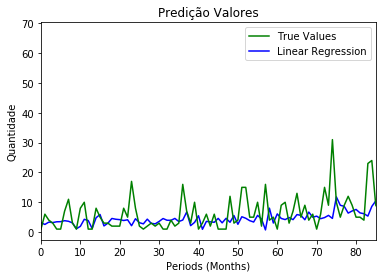

In [21]:
#Cria um gráfico dos valores reais, previsões da regressão linear e do modelo utilizando o último valor
from matplotlib import pyplot as plt
plt.title('Predição Valores')
plt.ylabel('Quantidade')
plt.xlabel(u'Periods (Months)')
reg_val, = plt.plot(y_pred,color='b',label=u'Linear Regression')
true_val, = plt.plot(y_true,color='g', label='True Values')
plt.xlim([0,85])
plt.legend(handles=[true_val,reg_val])
plt.show()